# ECE-657A - Assignment # 3
Date of Submission: 2nd April 2022

## Libraries

Now we will declare the libaries that are going to be used for this assignment as shown below:

In [2]:
# List of libraries
import math
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from pathlib import Path
import random
import seaborn as sns
from scipy import stats
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import FeatureAgglomeration
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import neighbors
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import os

## Load the Datasets

Now we will load the datasets by first importing the files to the Colab Servers as shown below:




In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Now, we will load the csv files into the pandas DataFrame as shown below:

In [223]:
# store the training and testing dataset of x
fashion_raw_x_train = pd.read_csv("/content/drive/MyDrive/Colab/ECE657A/Assignment_3/x_train.csv", sep=",")
fashion_raw_x_test = pd.read_csv("/content/drive/MyDrive/Colab/ECE657A/Assignment_3/x_test.csv", sep=",")

# store the training and testing dataset of the labels
fashion_raw_y_train = pd.read_csv("/content/drive/MyDrive/Colab/ECE657A/Assignment_3/y_train.csv", sep=",")
fashion_raw_y_test = pd.read_csv("/content/drive/MyDrive/Colab/ECE657A/Assignment_3/y_test.csv", sep=",")

Now we will see the shape of the dataset as shown below:

In [ ]:
print(f"Shape of x_train is {fashion_raw_x_train.shape}")
print(f"Shape of x_test is {fashion_raw_x_test.shape}")
print(f"Shape of y_train is {fashion_raw_y_train.shape}")
print(f"Shape of y_test is {fashion_raw_y_test.shape}")

Shape of x_train is (60000, 784)
Shape of x_test is (10000, 784)
Shape of y_train is (60000, 1)
Shape of y_test is (10000, 1)


The whole image is arranged in a single row of 784 elements. We need to convert the single rows in a 28 x 28 matrix for each record as shown below: 

In [ ]:
# convert the single array of 784 into 28x28 matrix for the training and testing dataset
fashion_x = fashion_raw_x_train.values.reshape(60000, 28, 28,1)/255
fashion_x_test =fashion_raw_x_test.values.reshape(10000, 28, 28,1)/255

# use one hot encoding to make seperate coloumns for each of the label
fashion_y = keras.utils.to_categorical(fashion_raw_y_train, 5)
fashion_y_test = keras.utils.to_categorical(fashion_raw_y_test, 5)

Now we will split the training data into training and validation set by using the train test split function as shown below:

In [ ]:
fashion_x_train, fashion_x_val, fashion_y_train, fashion_y_val = train_test_split(fashion_x, 
                                                                              fashion_y, test_size=0.2, random_state=27)

In [ ]:
print(f"Shape of training dataset after preprocessing: {fashion_x_train.shape}")
print(f"Shape of validation dataset after preprocessing: {fashion_x_val.shape}")
print(f"Shape of testing dataset after preprocessing: {fashion_x_test.shape}")

Shape of training dataset after preprocessing: (48000, 28, 28, 1)
Shape of validation dataset after preprocessing: (12000, 28, 28, 1)
Shape of testing dataset after preprocessing: (10000, 28, 28, 1)


## CM1: Default Network

For the default network, we will first begin by initializing the model according to the specifications mentioned in the rubric which is shown below:

In [ ]:
# initialize the default CNN model
cm1 = tf.keras.models.Sequential()

# Add convolution 2D
cm1.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                 kernel_initializer='he_normal', padding="same",
                 strides=(1,1), input_shape=(28, 28, 1)))

# Add a pooling layer
cm1.add(layers.MaxPooling2D((2, 2)))

# Add convolution 2D
cm1.add(layers.Conv2D(32, kernel_size=(3, 3), padding="same", 
                 strides=(1,1), activation='relu'))

# Flatten the layer
cm1.add(layers.Flatten())

# Add the fully connected layer
cm1.add(layers.Dense(128, activation='relu'))

# Add the softmax function for the output layer
cm1.add(layers.Dense(5, activation='softmax'))


cm1.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam',
              metrics=['accuracy'])

We will confirm the parameters of the CNN by using the summary function as shown below:

In [ ]:
cm1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                        

Now we will visualize the structure of the default neural network

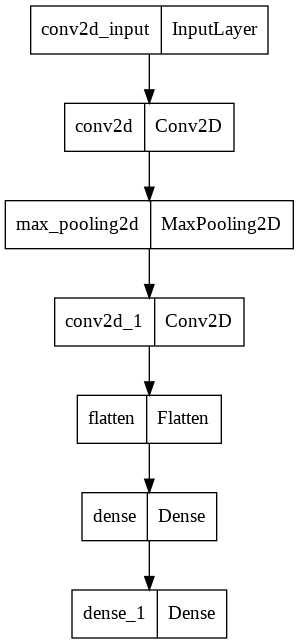

In [ ]:
plot_model(cm1, to_file='../model.png')

Now we are going to use the training and validation datasets to train the default model as shown below:

In [ ]:
# initialize the checkpoints for the default neural network
file_path = "../content/drive/MyDrive/Colab/ECE657A/Assignment_3/checkpoints/cm1_checkpoint.ckpt"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=file_path,
    save_weights_only=True,
    verbose=1)

In [ ]:
# train the default neural network
cm1_model = cm1.fit(fashion_x_train, fashion_y_train, batch_size=128, epochs=10, verbose=1, validation_data=(fashion_x_val,fashion_y_val), callbacks=[model_checkpoint_callback])

Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.3397 - accuracy: 0.8765
Epoch 1: saving model to ../content/drive/MyDrive/Colab/ECE657A/Assignment_3/checkpoints/cm1_checkpoint.ckpt
375/375 [==============================] - 55s 141ms/step - loss: 0.3397 - accuracy: 0.8765 - val_loss: 0.2402 - val_accuracy: 0.9155
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.2032 - accuracy: 0.9264
Epoch 2: saving model to ../content/drive/MyDrive/Colab/ECE657A/Assignment_3/checkpoints/cm1_checkpoint.ckpt
375/375 [==============================] - 48s 129ms/step - loss: 0.2032 - accuracy: 0.9264 - val_loss: 0.2102 - val_accuracy: 0.9265
Epoch 3/10
375/375 [==============================] - ETA: 0s - loss: 0.1629 - accuracy: 0.9409
Epoch 3: saving model to ../content/drive/MyDrive/Colab/ECE657A/Assignment_3/checkpoints/cm1_checkpoint.ckpt
375/375 [==============================] - 48s 128ms/step - loss: 0.1629 - accuracy: 0.9409 - val_loss: 0.1991 - val_

Now we will evaluate the performance of the model by using the testing dataset and see the test loss and test accuracy as shown below:

In [ ]:
cm1_test_score = cm1.evaluate(fashion_x_test, fashion_y_test, verbose=0)
print('Test loss:', cm1_test_score[0])
print('Test accuracy:', cm1_test_score[1])

Test loss: 0.19694621860980988
Test accuracy: 0.9405999779701233


Now we will plot the model accuracy of the neural network which is shown below:

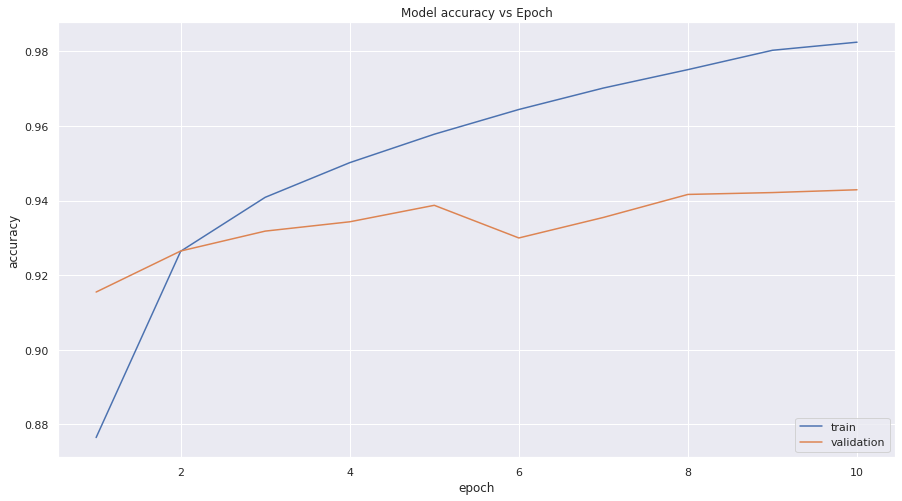

In [ ]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the information regarding the scatter plot
sns.lineplot( x=range(1,11),y =cm1_model.history["accuracy"])
sns.lineplot( x=range(1,11),y =cm1_model.history["val_accuracy"])

# assign a title to the plot
plt.title('Model accuracy vs Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

Now we will plot the cross entropy loss of the default neural network which is shwon below:

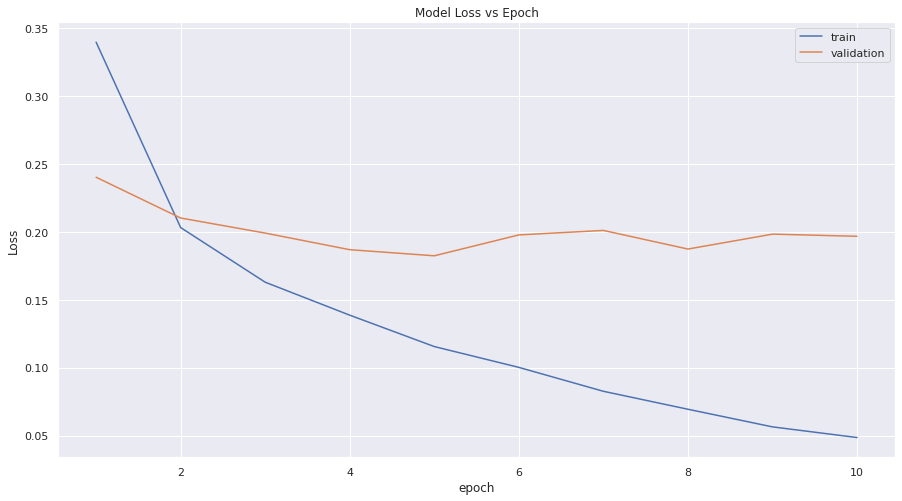

In [ ]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the information regarding the scatter plot
sns.lineplot( x=range(1,11),y =cm1_model.history["loss"])
sns.lineplot( x=range(1,11),y =cm1_model.history["val_loss"])

# assign a title to the plot
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

## CM2: Own Network

I want to see the effects of using different number of filters in the convolutional 2D layer. The structure of the neural network will remain the same as that of the default neural network. However, the number of filters will be changed.

4 different number of filters will be experimented with

In [ ]:
# initialize the file path for the different models
file_path = ["../content/drive/MyDrive/Colab/ECE657A/Assignment_3/checkpoints/cm2_checkpoint_0.ckpt","../content/drive/MyDrive/Colab/ECE657A/Assignment_3/checkpoints/cm2_checkpoint_1.ckpt","../content/drive/MyDrive/Colab/ECE657A/Assignment_3/checkpoints/cm2_checkpoint_2.ckpt","../content/drive/MyDrive/Colab/ECE657A/Assignment_3/checkpoints/cm2_checkpoint_3.ckpt"]

Now we will initialize four models for the different number of filters

In [ ]:
cm2_models = [0] * 4

for i in range(4):

  # initialize the default CNN model
  cm2_models[i] = tf.keras.models.Sequential()

  # Add convolution 2D
  cm2_models[i].add(layers.Conv2D(((i*8)+40), kernel_size=(3, 3), activation='relu',
                  kernel_initializer='he_normal', padding="same",
                  strides=(1,1), input_shape=(28, 28, 1)))

  # Add a pooling layer
  cm2_models[i].add(layers.MaxPooling2D((2, 2)))

  # Add convolution 2D
  cm2_models[i].add(layers.Conv2D(((i*8)+40), kernel_size=(3, 3), padding="same", 
                  strides=(1,1), activation='relu'))

  # Flatten the layer
  cm2_models[i].add(layers.Flatten())

  # Add the fully connected layer
  cm2_models[i].add(layers.Dense(128, activation='relu'))

  # Add the softmax function for the output layer
  cm2_models[i].add(layers.Dense(5, activation='softmax'))


  cm2_models[i].compile(loss=keras.losses.categorical_crossentropy, optimizer='adam',
                metrics=['accuracy'])

The summary of one of the models is shown below:

In [ ]:
cm2_models[0].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 40)        400       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 40)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 40)        14440     
                                                                 
 flatten_1 (Flatten)         (None, 7840)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1003648   
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                      

In [ ]:
cm2_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
  filepath=file_path[0],
  save_weights_only=True,
  verbose=1)
cm2_model_0 = cm2_models[0].fit(fashion_x_train, fashion_y_train, batch_size=128, epochs=10, verbose=1, validation_data=(fashion_x_val,fashion_y_val),callbacks=[cm2_checkpoint_callback])

Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.3312 - accuracy: 0.8786
Epoch 1: saving model to .
375/375 [==============================] - 81s 213ms/step - loss: 0.3312 - accuracy: 0.8786 - val_loss: 0.2383 - val_accuracy: 0.9132
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.2035 - accuracy: 0.9264
Epoch 2: saving model to .
375/375 [==============================] - 61s 162ms/step - loss: 0.2035 - accuracy: 0.9264 - val_loss: 0.2051 - val_accuracy: 0.9254
Epoch 3/10
375/375 [==============================] - ETA: 0s - loss: 0.1601 - accuracy: 0.9415
Epoch 3: saving model to .
375/375 [==============================] - 60s 159ms/step - loss: 0.1601 - accuracy: 0.9415 - val_loss: 0.1850 - val_accuracy: 0.9358
Epoch 4/10
375/375 [==============================] - ETA: 0s - loss: 0.1327 - accuracy: 0.9515
Epoch 4: saving model to .
375/375 [==============================] - 62s 164ms/step - loss: 0.1327 - accuracy: 0.9515 - val_loss: 0.

In [ ]:
cm2_model_0_score = cm2_models[0].evaluate(fashion_x_test, fashion_y_test, verbose=0)
print(f"Number of Filters: 40 --> Testing Accuracy: {cm2_model_0_score[1]}, Loss: {cm2_model_0_score[0]}")

Number of Filters: 40 --> Testing Accuracy: 0.9394000172615051, Loss: 0.21307262778282166


In [21]:
cm2_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
  filepath=file_path[1],
  save_weights_only=True,
  verbose=1)
cm2_model_1 = cm2_models[1].fit(fashion_x_train, fashion_y_train, batch_size=128, epochs=10, verbose=1, validation_data=(fashion_x_val,fashion_y_val),callbacks=[cm2_checkpoint_callback])

Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.3199 - accuracy: 0.8831
Epoch 1: saving model to .
375/375 [==============================] - 72s 190ms/step - loss: 0.3199 - accuracy: 0.8831 - val_loss: 0.2369 - val_accuracy: 0.9145
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.1971 - accuracy: 0.9295
Epoch 2: saving model to .
375/375 [==============================] - 71s 189ms/step - loss: 0.1971 - accuracy: 0.9295 - val_loss: 0.2054 - val_accuracy: 0.9237
Epoch 3/10
375/375 [==============================] - ETA: 0s - loss: 0.1565 - accuracy: 0.9441
Epoch 3: saving model to .
375/375 [==============================] - 71s 189ms/step - loss: 0.1565 - accuracy: 0.9441 - val_loss: 0.1910 - val_accuracy: 0.9307
Epoch 4/10
375/375 [==============================] - ETA: 0s - loss: 0.1307 - accuracy: 0.9522
Epoch 4: saving model to .
375/375 [==============================] - 72s 192ms/step - loss: 0.1307 - accuracy: 0.9522 - val_loss: 0.

In [22]:
cm2_model_1_score = cm2_models[1].evaluate(fashion_x_test, fashion_y_test, verbose=0)
print(f"Number of Filters: 48 --> Testing Accuracy: {cm2_model_1_score[1]}, Loss: {cm2_model_1_score[0]}")

Number of Filters: 48 --> Testing Accuracy: 0.9423999786376953, Loss: 0.2121349573135376


In [23]:
cm2_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
  filepath=file_path[2],
  save_weights_only=True,
  verbose=1)
cm2_model_2 = cm2_models[2].fit(fashion_x_train, fashion_y_train, batch_size=128, epochs=10, verbose=1, validation_data=(fashion_x_val,fashion_y_val),callbacks=[cm2_checkpoint_callback])

Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.3172 - accuracy: 0.8854
Epoch 1: saving model to /
375/375 [==============================] - 92s 244ms/step - loss: 0.3172 - accuracy: 0.8854 - val_loss: 0.2343 - val_accuracy: 0.9147
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.1923 - accuracy: 0.9313
Epoch 2: saving model to /
375/375 [==============================] - 91s 242ms/step - loss: 0.1923 - accuracy: 0.9313 - val_loss: 0.1980 - val_accuracy: 0.9286
Epoch 3/10
375/375 [==============================] - ETA: 0s - loss: 0.1524 - accuracy: 0.9443
Epoch 3: saving model to /
375/375 [==============================] - 91s 243ms/step - loss: 0.1524 - accuracy: 0.9443 - val_loss: 0.1817 - val_accuracy: 0.9349
Epoch 4/10
375/375 [==============================] - ETA: 0s - loss: 0.1255 - accuracy: 0.9546
Epoch 4: saving model to /
375/375 [==============================] - 91s 242ms/step - loss: 0.1255 - accuracy: 0.9546 - val_loss: 0.

In [24]:
cm2_model_2_score = cm2_models[2].evaluate(fashion_x_test, fashion_y_test, verbose=0)
print(f"Number of Filters: 56 --> Testing Accuracy: {cm2_model_2_score[1]}, Loss: {cm2_model_2_score[0]}")

Number of Filters: 56 --> Testing Accuracy: 0.9437999725341797, Loss: 0.22062315046787262


In [25]:
cm2_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
  filepath=file_path[3],
  save_weights_only=True,
  verbose=1)
cm2_model_3 = cm2_models[3].fit(fashion_x_train, fashion_y_train, batch_size=128, epochs=10, verbose=1, validation_data=(fashion_x_val,fashion_y_val),callbacks=[cm2_checkpoint_callback])

Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.3348 - accuracy: 0.8809
Epoch 1: saving model to c
375/375 [==============================] - 106s 282ms/step - loss: 0.3348 - accuracy: 0.8809 - val_loss: 0.2532 - val_accuracy: 0.9093
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.2000 - accuracy: 0.9275
Epoch 2: saving model to c
375/375 [==============================] - 106s 283ms/step - loss: 0.2000 - accuracy: 0.9275 - val_loss: 0.2056 - val_accuracy: 0.9267
Epoch 3/10
375/375 [==============================] - ETA: 0s - loss: 0.1609 - accuracy: 0.9411
Epoch 3: saving model to c
375/375 [==============================] - 106s 283ms/step - loss: 0.1609 - accuracy: 0.9411 - val_loss: 0.1964 - val_accuracy: 0.9291
Epoch 4/10
375/375 [==============================] - ETA: 0s - loss: 0.1339 - accuracy: 0.9511
Epoch 4: saving model to c
375/375 [==============================] - 107s 285ms/step - loss: 0.1339 - accuracy: 0.9511 - val_loss

In [26]:
cm2_model_3_score = cm2_models[3].evaluate(fashion_x_test, fashion_y_test, verbose=0)
print(f"Number of Filters: 64 --> Testing Accuracy: {cm2_model_3_score[1]}, Loss: {cm2_model_3_score[0]}")

Number of Filters: 64 --> Testing Accuracy: 0.9384999871253967, Loss: 0.2232612520456314


## CM3: Results Analysis

To see the training accuracy of the different models, see the following graph:

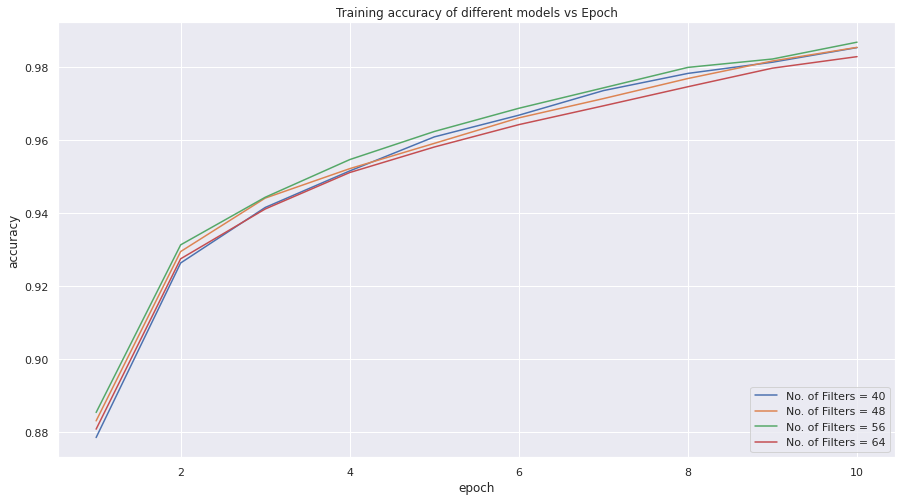

In [28]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the information regarding the scatter plot
sns.lineplot( x=range(1,11),y =cm2_model_0.history["accuracy"])
sns.lineplot( x=range(1,11),y =cm2_model_1.history["accuracy"])
sns.lineplot( x=range(1,11),y =cm2_model_2.history["accuracy"])
sns.lineplot( x=range(1,11),y =cm2_model_3.history["accuracy"])

# assign a title to the plot
plt.title('Training accuracy of different models vs Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['No. of Filters = 40', 'No. of Filters = 48',"No. of Filters = 56","No. of Filters = 64"], loc='lower right')

The testing accuracy of the different models is the following:

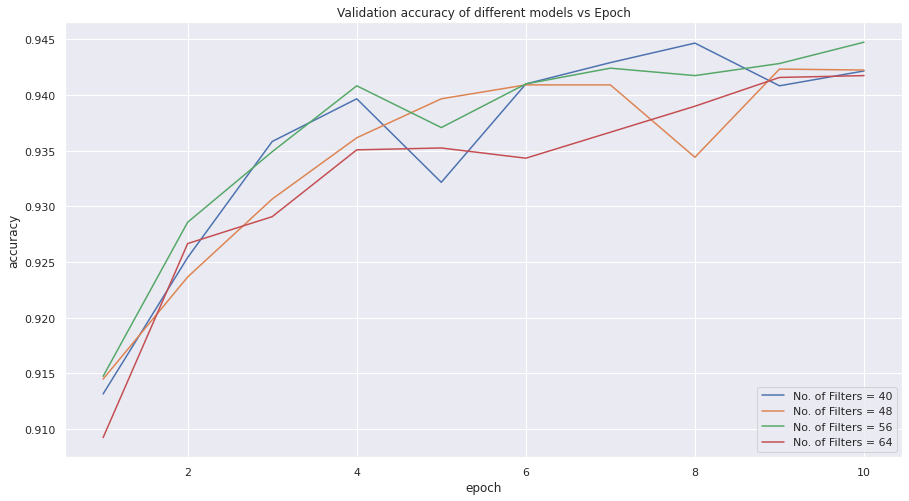

In [30]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the information regarding the scatter plot
sns.lineplot( x=range(1,11),y =cm2_model_0.history["val_accuracy"])
sns.lineplot( x=range(1,11),y =cm2_model_1.history["val_accuracy"])
sns.lineplot( x=range(1,11),y =cm2_model_2.history["val_accuracy"])
sns.lineplot( x=range(1,11),y =cm2_model_3.history["val_accuracy"])

# assign a title to the plot
plt.title('Validation accuracy of different models vs Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['No. of Filters = 40', 'No. of Filters = 48',"No. of Filters = 56","No. of Filters = 64"], loc='lower right')

Based on the training and testing accuracy of different model, the best model was with 56. Therefore, we will use the model with 56 filters for further analysis

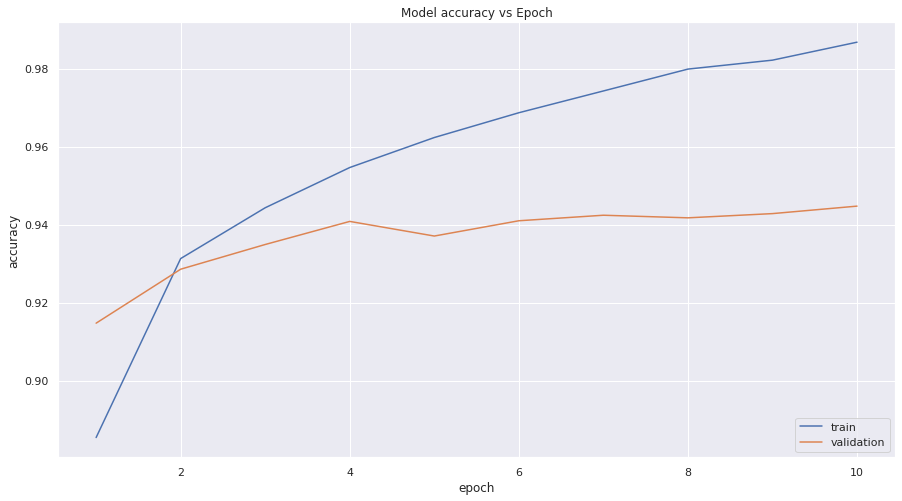

In [522]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the information regarding the scatter plot
sns.lineplot( x=range(1,11),y =cm2_model_2.history["accuracy"])
sns.lineplot( x=range(1,11),y =cm2_model_2.history["val_accuracy"])

# assign a title to the plot
plt.title('Model accuracy vs Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

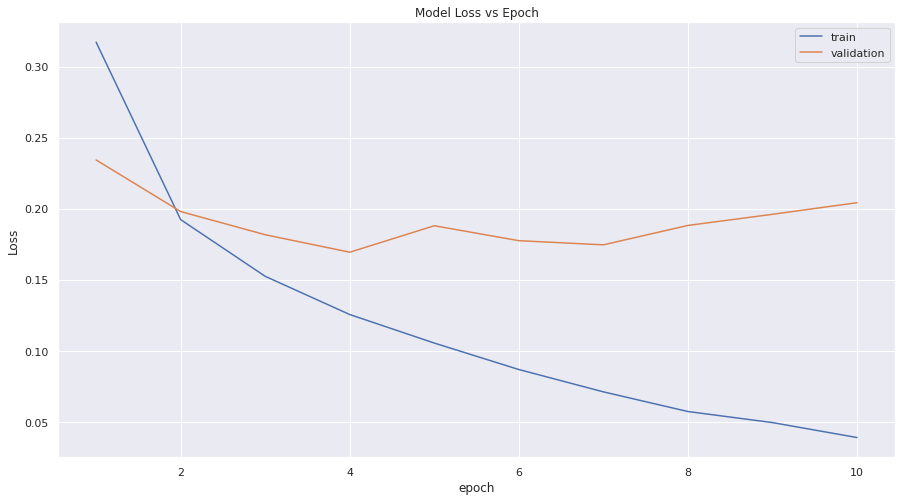

In [33]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the information regarding the scatter plot
sns.lineplot( x=range(1,11),y =cm2_model_2.history["loss"])
sns.lineplot( x=range(1,11),y =cm2_model_2.history["val_loss"])

# assign a title to the plot
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

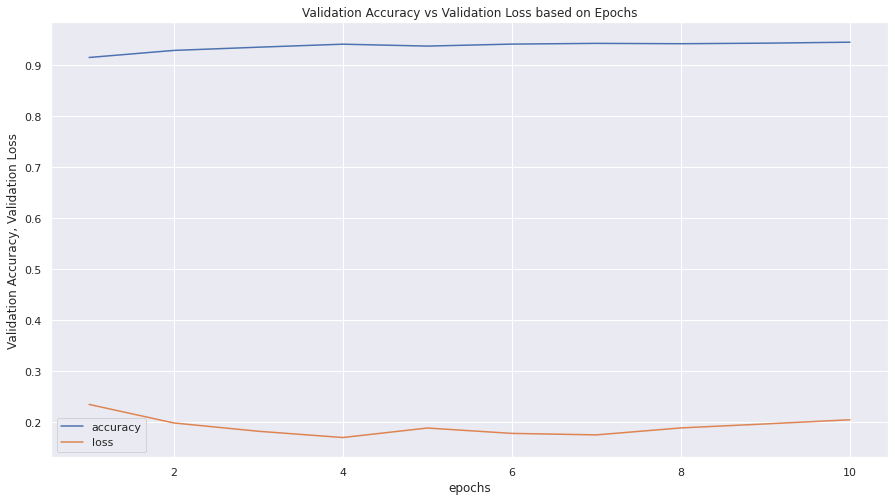

In [35]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the information regarding the scatter plot
sns.lineplot( x=range(1,11),y =cm2_model_2.history["val_accuracy"])
sns.lineplot( x=range(1,11),y =cm2_model_2.history["val_loss"])

# assign a title to the plot
plt.title('Validation Accuracy vs Validation Loss based on Epochs')
plt.ylabel('Validation Accuracy, Validation Loss')
plt.xlabel('epochs')
plt.legend(['accuracy', 'loss'])

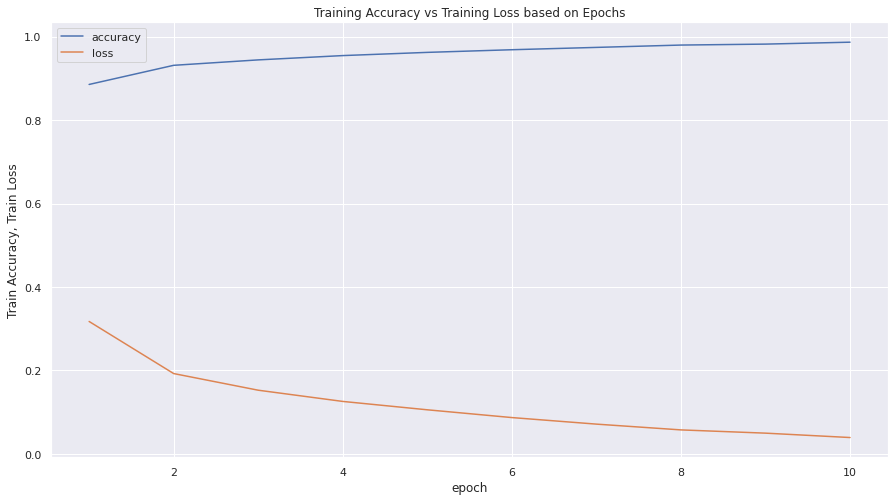

In [36]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the information regarding the scatter plot
sns.lineplot( x=range(1,11),y =cm2_model_2.history["accuracy"])
sns.lineplot( x=range(1,11),y =cm2_model_2.history["loss"])

# assign a title to the plot
plt.title('Training Accuracy vs Training Loss based on Epochs')
plt.ylabel('Train Accuracy, Train Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'])

## CM4: Using your own Encoding

Summary of the choosen network which is shown below:

In [523]:
cm2_models[2].summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 56)        560       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 56)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 56)        28280     
                                                                 
 flatten_3 (Flatten)         (None, 10976)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               1405056   
                                                                 
 dense_7 (Dense)             (None, 5)                 645       
                                                      

Record the output of the last dense layer as shown below:

In [41]:
intermediate_layer_model = keras.Model(inputs=cm2_models[2].input, outputs=cm2_models[2].get_layer('dense_6').output)

intermediate_output = intermediate_layer_model(fashion_x_test,fashion_y_test)

Initialize the PCA algorithm from sklearn as shown below:

In [42]:
cm4_pca =PCA(n_components = 2)
cm4_pca_fit = cm4_pca.fit_transform(intermediate_output)
cm4_pca_final = pd.DataFrame(cm4_pca_fit, columns =["PCA-1","PCA-2"])
cm4_pca_final["label"] = fashion_raw_y_test

generate the graph as shown below:

Text(0.5, 1.0, 'Graph of first two components of the last layer of the neural network')

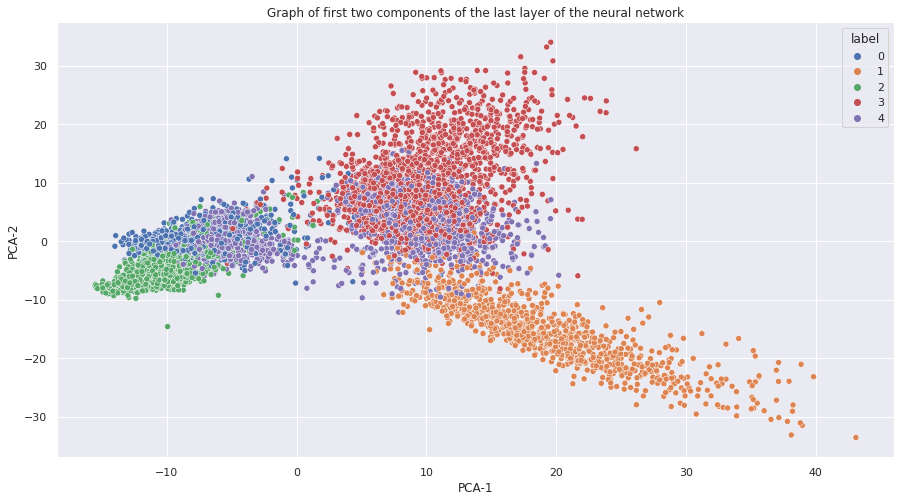

In [344]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the information regarding the scatter plot
sns.scatterplot(data = cm4_pca_final, x = "PCA-1", y = "PCA-2", hue = "label", palette="deep")

# assign a title to the plot
plt.title("Graph of first two components of the last layer of the neural network")

### PCA with DBSCAN

Initialize the DBSCAN algorithm with the appropriate hyperparameters

In [447]:
# initialize DBSCAN from scikit learn
cm4_dbscan = DBSCAN(eps= 11, min_samples=13)

# input the data from the last dense layer
cm4_dbscan_final = cm4_dbscan.fit_predict(intermediate_output)

# check the number of labels
np.unique(cm4_dbscan.labels_)

array([-1,  0,  1,  2,  3,  4])

Confirm the number of labels and the frequency of clusters 

In [474]:
len(cm4_dbscan.labels_ )

10000

In [489]:
len(cm4_dbscan.labels_[cm4_dbscan.labels_ == 4])

15

In [451]:
len(cm4_dbscan.labels_[cm4_dbscan.labels_ == 4])

15

assign the labels to the pca dataset

In [449]:
dbscan_filtered_label0 = cm4_pca_fit[cm4_dbscan.labels_ == 0]
dbscan_filtered_label1 = cm4_pca_fit[cm4_dbscan.labels_ == 1]
dbscan_filtered_label2 = cm4_pca_fit[cm4_dbscan.labels_ == 2]
dbscan_filtered_label3 = cm4_pca_fit[cm4_dbscan.labels_ == 3]
dbscan_filtered_label4 = cm4_pca_fit[cm4_dbscan.labels_ == 4]
dbscan_filtered_label_1 = cm4_pca_fit[cm4_dbscan.labels_ == -1]

generate the graph as shown below:

Text(0, 0.5, 'PCA-2')

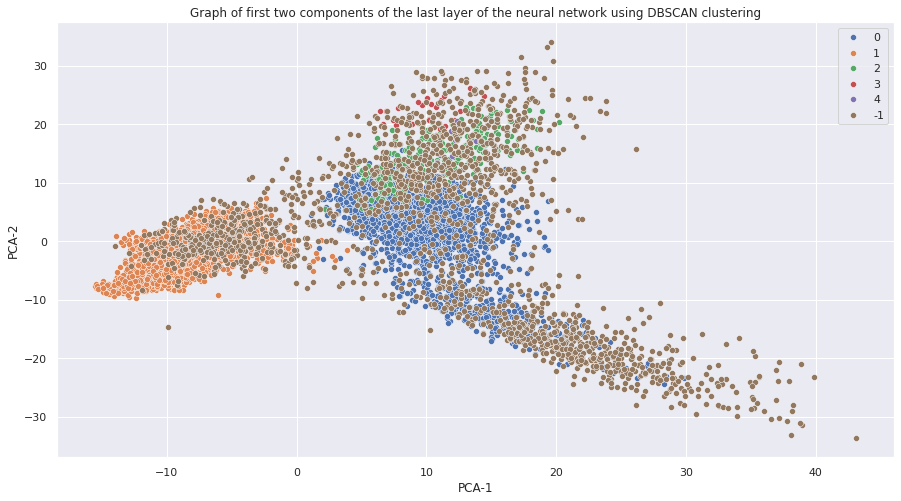

In [450]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the information regarding the scatter plot
sns.scatterplot(x = dbscan_filtered_label0[:,0], y = dbscan_filtered_label0[:,1])
sns.scatterplot(x = dbscan_filtered_label1[:,0], y = dbscan_filtered_label1[:,1])
sns.scatterplot(x = dbscan_filtered_label2[:,0], y = dbscan_filtered_label2[:,1])
sns.scatterplot(x = dbscan_filtered_label3[:,0], y = dbscan_filtered_label3[:,1])
sns.scatterplot(x = dbscan_filtered_label4[:,0], y = dbscan_filtered_label4[:,1])
sns.scatterplot(x = dbscan_filtered_label_1[:,0], y = dbscan_filtered_label_1[:,1])

# assign a title to the plot
plt.title("Graph of first two components of the last layer of the neural network using DBSCAN clustering")
plt.legend(['0', '1', '2', '3', '4', '-1'])
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")

### PCA with K-means

First we will initialize the K-means algorithm from Scikit learn as shown below:

In [471]:
# initialize the k-means clustering algorithm
cm4_kmeans = KMeans(n_clusters=5)

# fit the data from the output of the last dense layer
cm4_kmeans.fit(intermediate_output)

# check the number of labels
np.unique(cm4_kmeans.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

Check the frequency of clusters

In [495]:
len(cm4_kmeans.labels_[cm4_kmeans.labels_ == 4])

945

Assign the labels to the PCA dataset

In [453]:
kmeans_pca_filtered_label0 = cm4_pca_fit[cm4_kmeans.labels_ == 0]
kmeans_pca_filtered_label1 = cm4_pca_fit[cm4_kmeans.labels_ == 1]
kmeans_pca_filtered_label2 = cm4_pca_fit[cm4_kmeans.labels_ == 2]
kmeans_pca_filtered_label3 = cm4_pca_fit[cm4_kmeans.labels_ == 3]
kmeans_pca_filtered_label4 = cm4_pca_fit[cm4_kmeans.labels_ == 4]

generate the graph as shown below:

Text(0, 0.5, 'PCA-2')

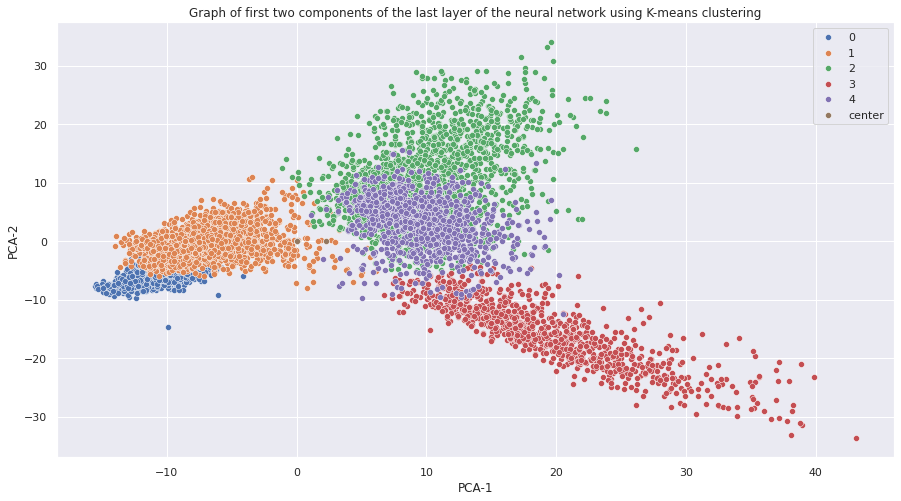

In [454]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the information regarding the scatter plot
sns.scatterplot(x = kmeans_pca_filtered_label0[:,0], y = kmeans_pca_filtered_label0[:,1])
sns.scatterplot(x = kmeans_pca_filtered_label1[:,0], y = kmeans_pca_filtered_label1[:,1])
sns.scatterplot(x = kmeans_pca_filtered_label2[:,0], y = kmeans_pca_filtered_label2[:,1])
sns.scatterplot(x = kmeans_pca_filtered_label3[:,0], y = kmeans_pca_filtered_label3[:,1])
sns.scatterplot(x = kmeans_pca_filtered_label4[:,0], y = kmeans_pca_filtered_label4[:,1])
sns.scatterplot(x = cm4_kmeans.cluster_centers_[:,0], y = cm4_kmeans.cluster_centers_[:,1],sizes=(50, 400))

# assign a title to the plot
plt.title("Graph of first two components of the last layer of the neural network using K-means clustering")
plt.legend(['0', '1', '2', '3', '4', 'center'])
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")

### t-SNE

Initialize the t-SNE algorithm and peroform the fit and transform

In [123]:
cm4_tsne = TSNE(n_components=2, verbose=1, random_state=27).fit_transform(intermediate_output, fashion_raw_y_test)
cm4_tsne_final = pd.DataFrame(cm4_tsne,columns=["Comp-1", "Comp-2"])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 4.371s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.722187
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.062576
[t-SNE] KL divergence after 1000 iterations: 1.523114


In [124]:
cm4_tsne_final["label"] = fashion_raw_y_test

generate the graph as shown below:

Text(0.5, 1.0, 't-SNE graph of the 2 components')

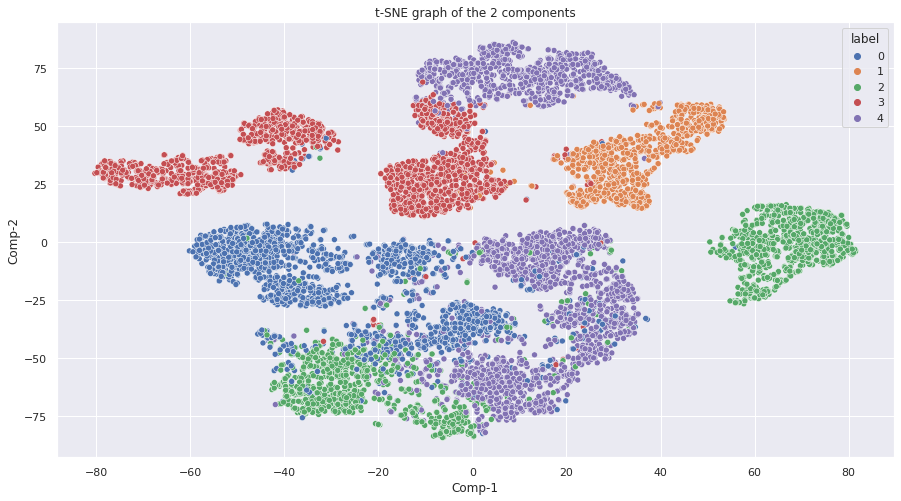

In [126]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the information regarding the scatter plot
sns.scatterplot(data = cm4_tsne_final, x = "Comp-1", y = "Comp-2", hue = "label", palette="deep")

# assign a title to the plot
plt.title("t-SNE graph of the 2 components")

### t-SNE with DBSCAN

Since DBSCAN has already been implemented on the output of the last layer, we will just use the labels to generate the t-SNE graph as shown below

In [455]:
dbscan_tsne_filtered_label0 = cm4_tsne[cm4_dbscan.labels_ == 0]
dbscan_tsne_filtered_label1 = cm4_tsne[cm4_dbscan.labels_ == 1]
dbscan_tsne_filtered_label2 = cm4_tsne[cm4_dbscan.labels_ == 2]
dbscan_tsne_filtered_label3 = cm4_tsne[cm4_dbscan.labels_ == 3]
dbscan_tsne_filtered_label4 = cm4_tsne[cm4_dbscan.labels_ == 4]
dbscan_tsne_filtered_label_1 = cm4_tsne[cm4_dbscan.labels_ == -1]

Generate the graph as shown below:

Text(0, 0.5, 'Component-2')

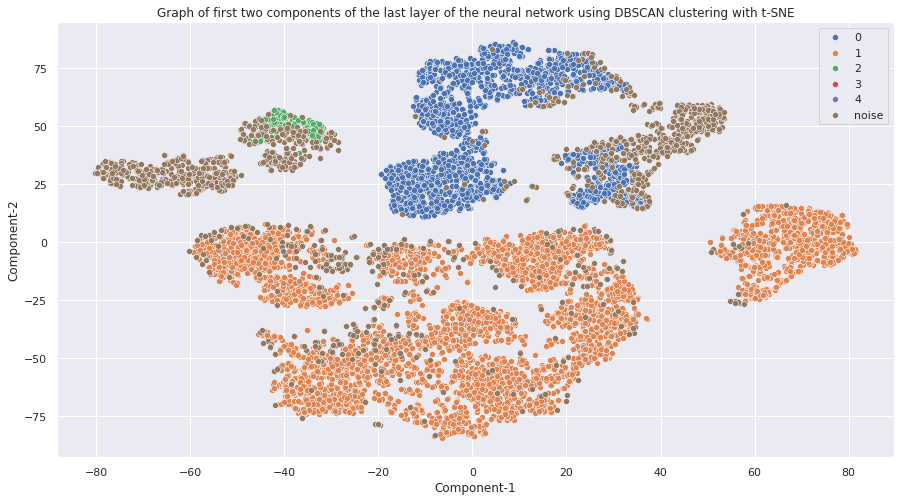

In [461]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the information regarding the scatter plot
sns.scatterplot(x = dbscan_tsne_filtered_label0[:,0], y = dbscan_tsne_filtered_label0[:,1])
sns.scatterplot(x = dbscan_tsne_filtered_label1[:,0], y = dbscan_tsne_filtered_label1[:,1])
sns.scatterplot(x = dbscan_tsne_filtered_label2[:,0], y = dbscan_tsne_filtered_label2[:,1])
sns.scatterplot(x = dbscan_tsne_filtered_label3[:,0], y = dbscan_tsne_filtered_label3[:,1])
sns.scatterplot(x = dbscan_tsne_filtered_label4[:,0], y = dbscan_tsne_filtered_label4[:,1])
sns.scatterplot(x = dbscan_tsne_filtered_label_1[:,0], y = dbscan_tsne_filtered_label_1[:,1])

# assign a title to the plot
plt.title("Graph of first two components of the last layer of the neural network using DBSCAN clustering with t-SNE")
plt.legend(['0', '1', '2', '3', '4', 'noise'])
plt.xlabel("Component-1")
plt.ylabel("Component-2")

### t-SNE with K-means

apply the labels on the t-SNE data as shown below:

In [477]:
kmeans_tsne_filtered_label0 = cm4_tsne[cm4_kmeans.labels_ == 0]
kmeans_tsne_filtered_label1 = cm4_tsne[cm4_kmeans.labels_ == 1]
kmeans_tsne_filtered_label2 = cm4_tsne[cm4_kmeans.labels_ == 2]
kmeans_tsne_filtered_label3 = cm4_tsne[cm4_kmeans.labels_ == 3]
kmeans_tsne_filtered_label4 = cm4_tsne[cm4_kmeans.labels_ == 4]

Generate the graph as shown below:

Text(0, 0.5, 'Component-2')

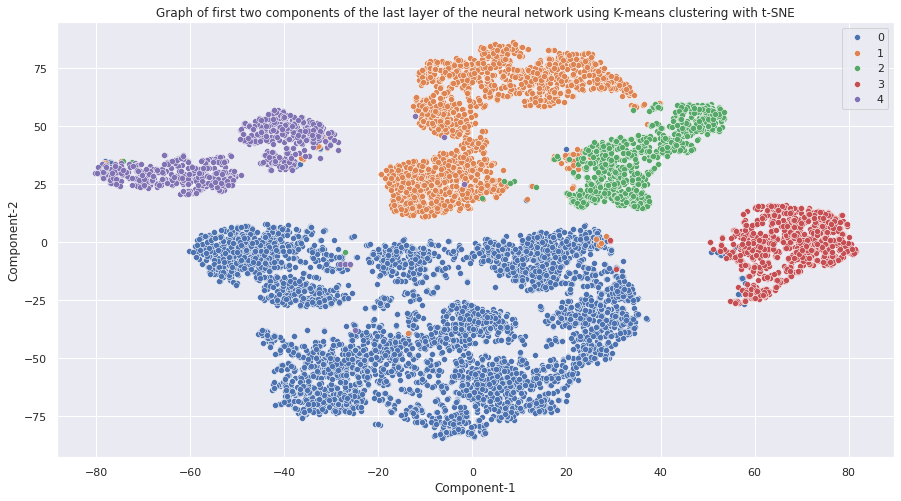

In [481]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the information regarding the scatter plot
sns.scatterplot(x = kmeans_tsne_filtered_label0[:,0], y = kmeans_tsne_filtered_label0[:,1])
sns.scatterplot(x = kmeans_tsne_filtered_label1[:,0], y = kmeans_tsne_filtered_label1[:,1])
sns.scatterplot(x = kmeans_tsne_filtered_label2[:,0], y = kmeans_tsne_filtered_label2[:,1])
sns.scatterplot(x = kmeans_tsne_filtered_label3[:,0], y = kmeans_tsne_filtered_label3[:,1])
sns.scatterplot(x = kmeans_tsne_filtered_label4[:,0], y = kmeans_tsne_filtered_label4[:,1])

# assign a title to the plot
plt.title("Graph of first two components of the last layer of the neural network using K-means clustering with t-SNE")
plt.legend(['0', '1', '2', '3', '4'])
plt.xlabel("Component-1")
plt.ylabel("Component-2")

### Results of Clustering & t-SNE

We need to first see the classification based on the original labels

In [251]:
# define the labels for the data
labels = {0 : "0", 1: "1", 2: "2", 3: "3", 4: "4"}

# define a function for selecting random rows from the test data and reshape to 28 x 28
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    # Iterate over the keys of the labels dictionary defined in the above cell
    for k in range(0,5):
        # Get four samples for each category
        samples = data[data["label"] == k].sample(8)
        # Append the samples to the samples list
        for j, s in enumerate(samples.values):
            # First column contain labels, hence index should start from 1
            img = np.array(samples.iloc[j, 1:]).reshape(28,28)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, -1])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

# define the original dataset
train_check = fashion_raw_x_train

# append the original labels
train_check["label"] = fashion_raw_y_train

# generate the sample image data with shape of 28 x 28
train_sample_images, train_sample_labels = sample_images_data(train_check)

Total number of sample images to plot:  40


The classification based on the original labels is shown below

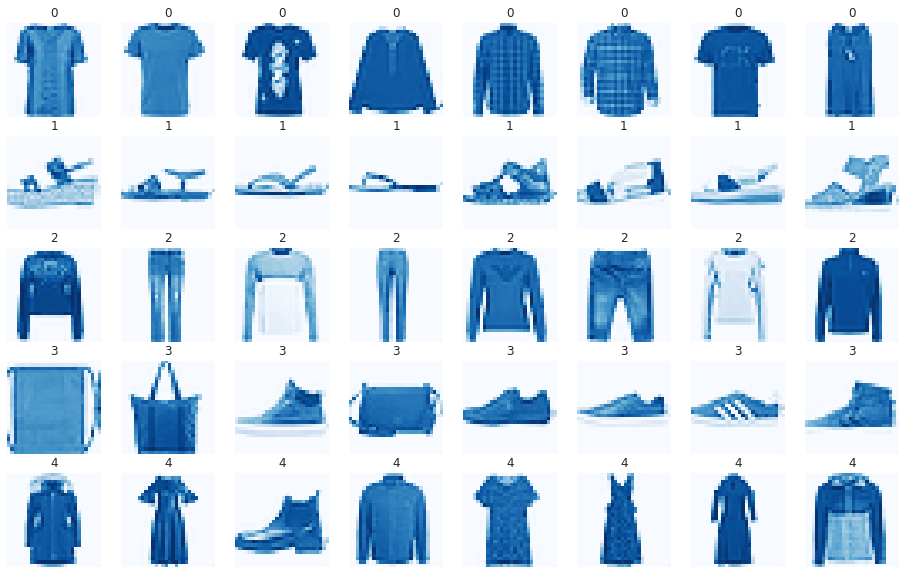

In [253]:
# define a function for generating the subplot
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels, "Blues")

Now we will apply the labels generated by k-means with tsne which is shown below

Total number of sample images to plot:  40


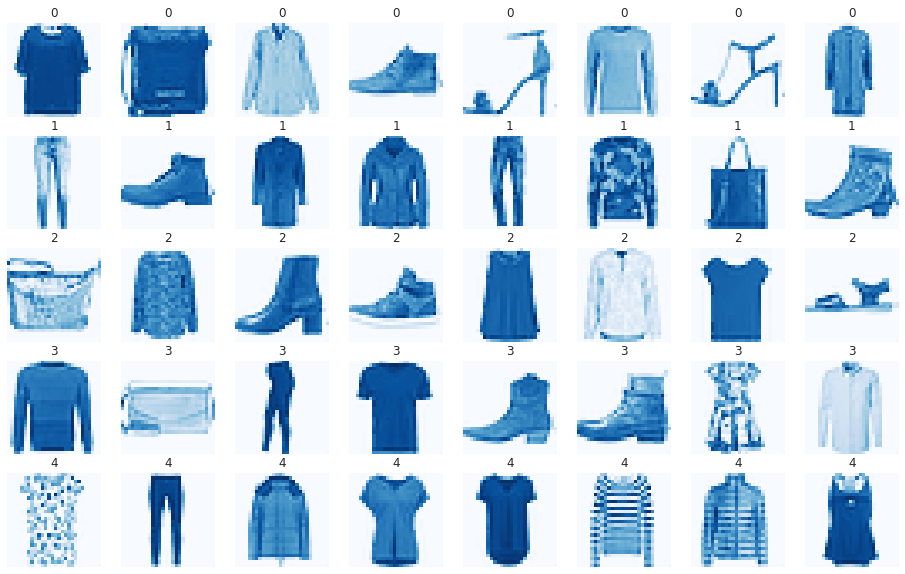

In [482]:
# initialized the dataset from the testing data
cm4_kmeans_test = fashion_raw_x_train

# replace the original labels with the labels generated from k means on the tsne data
cm4_kmeans_test["label"] = pd.DataFrame(cm4_kmeans.labels_)

# generate the 28 x 28 matrix
train_sample_images, train_sample_labels = sample_images_data(cm4_kmeans_test)

# plot the data
plot_sample_images(train_sample_images,train_sample_labels, "Blues")

Now we will apply the labels generated by DBSCAN with tsne which is shown below

Total number of sample images to plot:  40


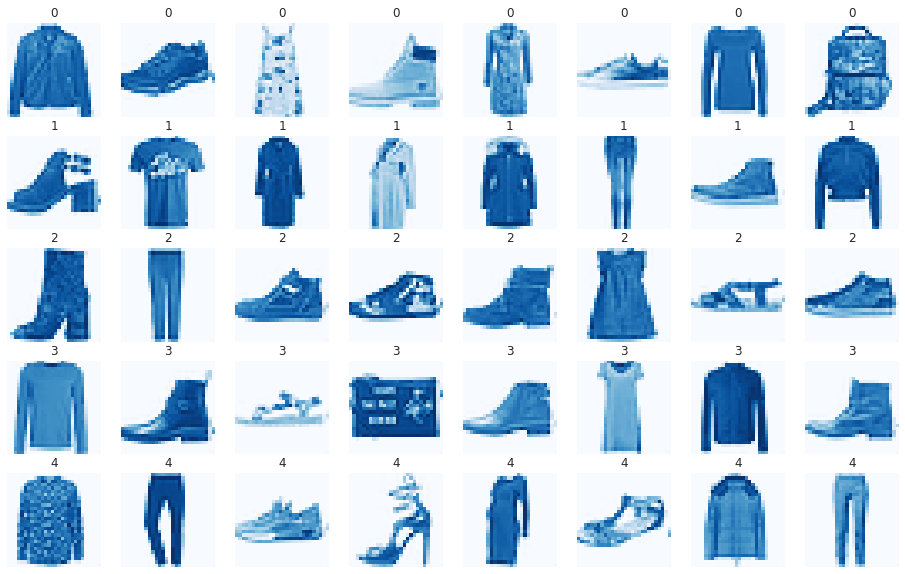

In [483]:
# initialized the dataset from the testing data
cm4_kmeans_test = fashion_raw_x_train

# replace the original labels with the labels generated from k means on the tsne data
cm4_kmeans_test["label"] = pd.DataFrame(cm4_dbscan.labels_)

# generate the 28 x 28 matrix
train_sample_images, train_sample_labels = sample_images_data(cm4_kmeans_test)

# plot the data
plot_sample_images(train_sample_images,train_sample_labels, "Blues")

### Other Approach on the Encoding

We will apply Mini Batch K mean clustering algorithm on the encoding and generate the labels as shown below




In [516]:
cm4_minik = MiniBatchKMeans(n_clusters=5)
cm4_minik.fit(intermediate_output)
cm4_minik.labels_

array([3, 0, 4, ..., 1, 4, 1], dtype=int32)

apply the labels on the t-sne data as shown below:

In [517]:
minik_filtered_label0 = cm4_tsne[cm4_minik.labels_ == 0]
minik_filtered_label1 = cm4_tsne[cm4_minik.labels_ == 1]
minik_filtered_label2 = cm4_tsne[cm4_minik.labels_ == 2]
minik_filtered_label3 = cm4_tsne[cm4_minik.labels_ == 3]
minik_filtered_label4 = cm4_tsne[cm4_minik.labels_ == 4]

generate the plot as shown below:

In [3]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the information regarding the scatter plot
sns.scatterplot(x = minik_filtered_label0[:,0], y = minik_filtered_label0[:,1])
sns.scatterplot(x = minik_filtered_label1[:,0], y = minik_filtered_label1[:,1])
sns.scatterplot(x = minik_filtered_label2[:,0], y = minik_filtered_label2[:,1])
sns.scatterplot(x = minik_filtered_label3[:,0], y = minik_filtered_label3[:,1])
sns.scatterplot(x = minik_filtered_label4[:,0], y = minik_filtered_label4[:,1])

# assign a title to the plot
plt.title("Graph of first two components of the last layer of the neural network using mini batch K-means clustering with t-SNE")
plt.legend(['0', '1', '2', '3', '4'])
plt.xlabel("Component-1")
plt.ylabel("Component-2")

NameError: ignored

## References

1. __CNN with Tensorflow | Keras for Fashion MNIST__, by Gabriel Preda, _Kaggle_, 2022. Click [here](https://www.kaggle.com/code/gpreda/cnn-with-tensorflow-keras-for-fashion-mnist/notebook#Read-the-data)

2. __A Gentle Introduction to Padding and Stride for Convolutional Neural Networks__, by Jason Brownlee, _Machine Learning Mastery_, 2019. Click [here](https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/)

3. __K-Means Clustering in Python: A Practical Guide__, by Kevin Arvai, _Real Python_. Click [here](https://realpython.com/k-means-clustering-python/)

4. __Tutorial for DBSCAN Clustering in Python Sklearn__, by Veer Kumar, _Machine Learning Knowledge_, 2021. Click [here](https://machinelearningknowledge.ai/tutorial-for-dbscan-clustering-in-python-sklearn/)

5. __An Introduction to t-SNE with Python Example__, by Andre Violante, _Towards Data Science_, 2018. Click [here](https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1)

6. __Principal Component Analysis (PCA) in Python Tutorial__,by 
Aditya Sharma, _Data Camp_, 2020. Click [here](https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python)